In [272]:
import numpy as np
import matplotlib
import math
%matplotlib inline

from matplotlib import pyplot as plt

$$ x^2 + 4sin(x)-2 $$

In [273]:
def f(x):
    return np.power(x, 2) + 4 * np.sin(x) - 2

The boundaries of the considered interval

In [274]:
a = 10

The point at which we construct plots of functions

In [275]:
x = np.arange(-a, a, 0.001, np.float)

Plot of original function

In [311]:
def plot_func(f=f, label="f(x)"):
    plt.figure(figsize=(12, 6))
    plt.plot(x, f(x), label=label)
    plt.title("original function")
    plt.legend(loc='lower right')
    plt.show()

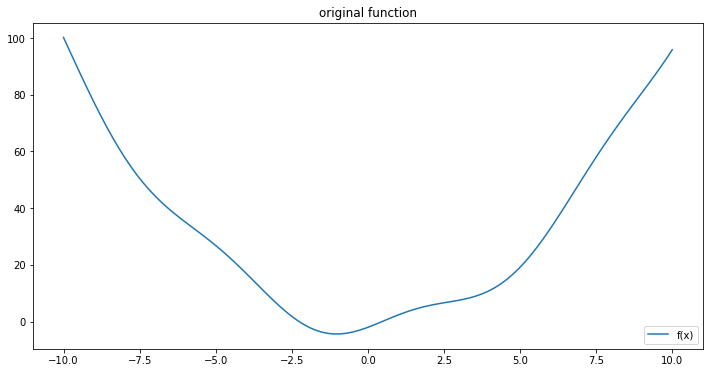

In [312]:
plot_func()

### Lagrange polynomial on equaly spaced points 

Interpolation points

In [277]:
def get_linspace(a, n):
    return np.linspace(-a, a, n, np.float)

We construct our intrpolation function using following formulas:

$$ L_n(x) = \sum_{i=0}^{n} l_i(x)f(x_i) = \sum_{i=0}^{n} \frac{\omega_{n+1}(x)}{(x-x_i)\omega_{n+1}'(x_i)} f(x_i)$$

$$ \omega_{n+1}(x) = (x-x_0)(x-x_1)...(x-x_n)$$

$$ \omega_{n+1}'(x_k) = (x-x_0)..(x-x_{k-1})(x-x_{k+1})...(x-x_n)$$

$$ l_k(x) = \frac{\omega_{n+1}(x)}{(x-x_k) \omega_{n+1}'(x_k)}$$

In [278]:
def omega(x, k, xn):
    prod = 1
    for i, xi in enumerate(xn): 
        if(i != k):
            prod *= (x - xi)
    return prod

In [279]:
def omega_(k, xn):
    prod = 1
    for i, xi in enumerate(xn):
        if i != k:
            prod *= (xn[k] - xi)
            
    return prod
            

In [280]:
def l(x, k, xn):
    return omega(x, k, xn) / omega_(k, xn)

In [281]:
def L_n(x, xn, f=f):
    sum = 0
    for i, xi in enumerate(xn):
        sum += l(x, i, xn) * f(xi)
    return sum

Utility functions for esear plotting

In [282]:
def plot_diff(L_1, L_2, a, n, f=f, get_lin_1=get_linspace, get_lin_2=get_linspace, \
              label1="original function", label2="interpolation in eq. spaced point", \
              label3="interpolation in Ch. point"):
    xn_1 = get_lin_1(a, n)
    xn_2 = get_lin_2(a, n)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, f(x), label=label1)
    plt.plot(x, L_1(x, xn_1, f), label=label2)
    plt.plot(x, L_2(x, xn_2, f), label=label3)
    plt.title("Сравнение при {}-х узлах".format(n))
    plt.legend(loc='lower right')
    plt.show()

In [283]:
def plot_int(L, a, n, f=f, get_linspace=get_linspace, \
             label1="original function", label2="interpolation in eq. spaced point"):
    xn = get_linspace(a, n)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, f(x), label=label1)
    plt.plot(x, L(x, xn, f), label=label2)
    plt.title("Сравнение при {}-х узлах".format(n))
    plt.legend(loc='lower right')
    plt.show()

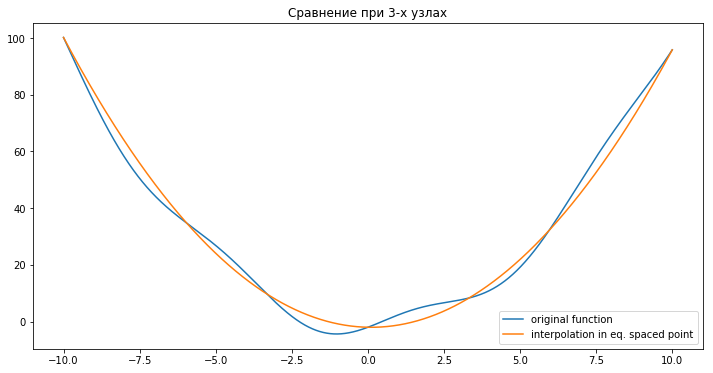

In [284]:
plot_int(L_n, a, 3)

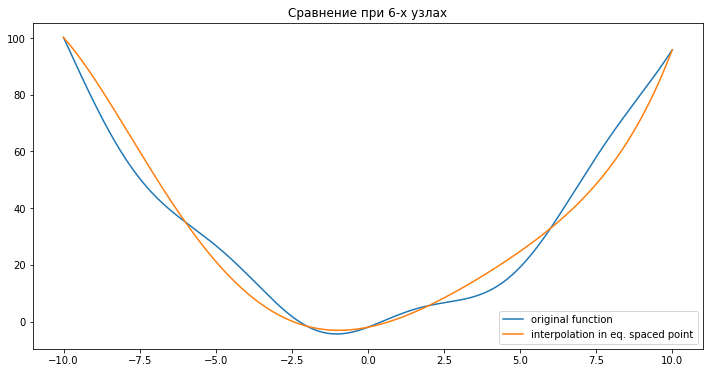

In [285]:
plot_int(L_n, a, 6)

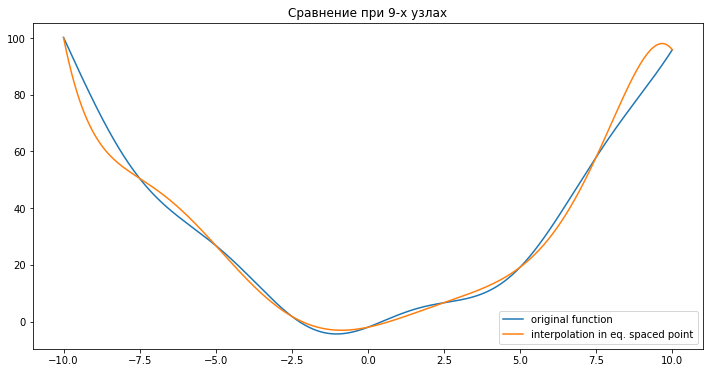

In [286]:
plot_int(L_n, a, 9)

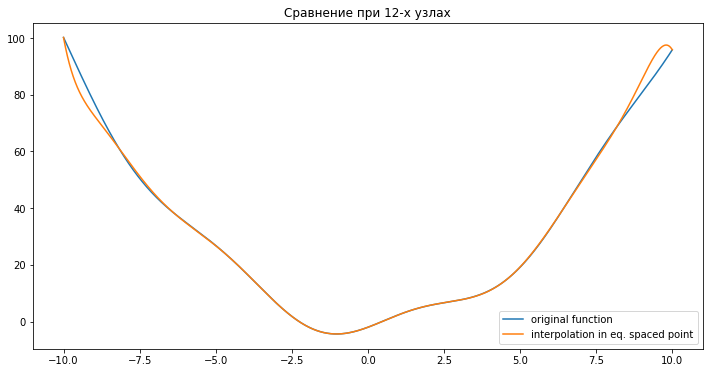

In [287]:
plot_int(L_n, a, 12)

### Lagrange polynomial with points in Ch. polynomial roots

Ch. polynomial roots are:

$$ x_i = acos(\frac{2i+1}{2n+2}\pi)$$$$i=0,...,n$$

In [288]:
def get_roots(a, n):
    xn = []
    for i in range(n+1):
        xn.append(a * np.cos((2 * i + 1) * np.pi / (2 * n + 2)))
    return xn

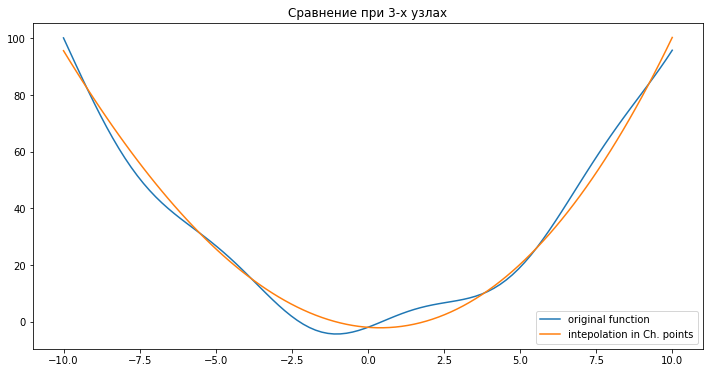

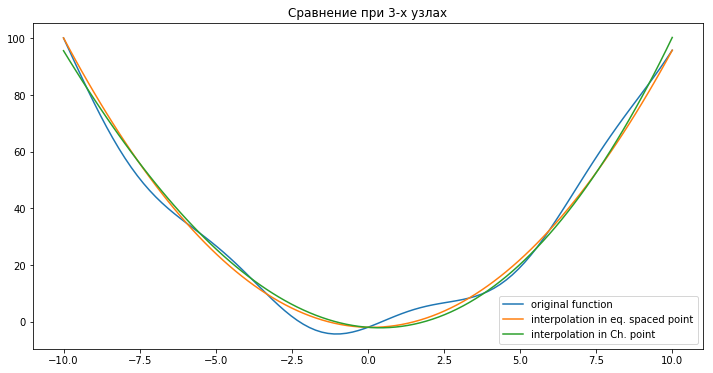

In [309]:
n=3
plot_int(L_n, a, n, get_linspace=get_roots, label2="intepolation in Ch. points")
plot_diff(L_n, L_n, a, n, get_lin_2=get_roots)

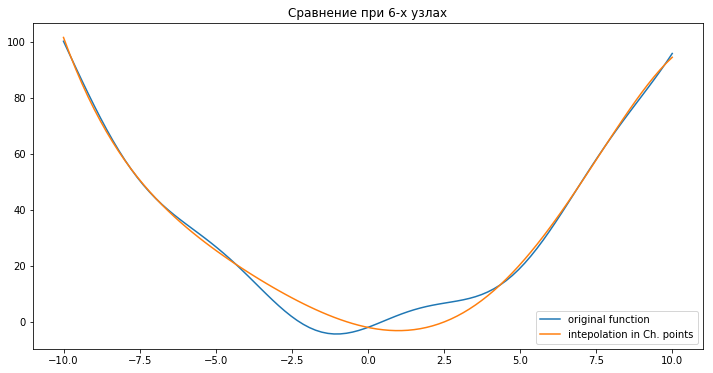

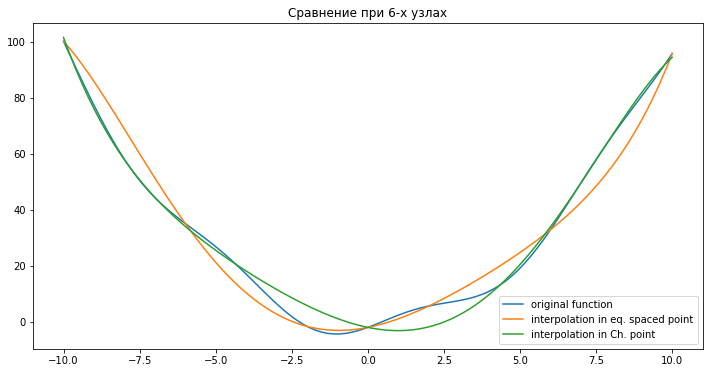

In [310]:
n=6
plot_int(L_n, a, n, get_linspace=get_roots, label2="intepolation in Ch. points")
plot_diff(L_n, L_n, a, n, get_lin_2=get_roots)

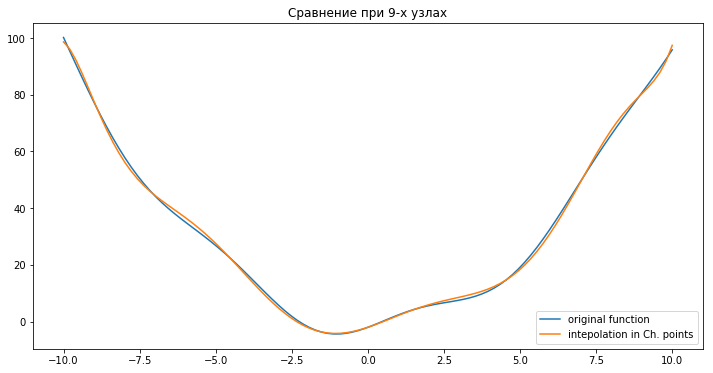

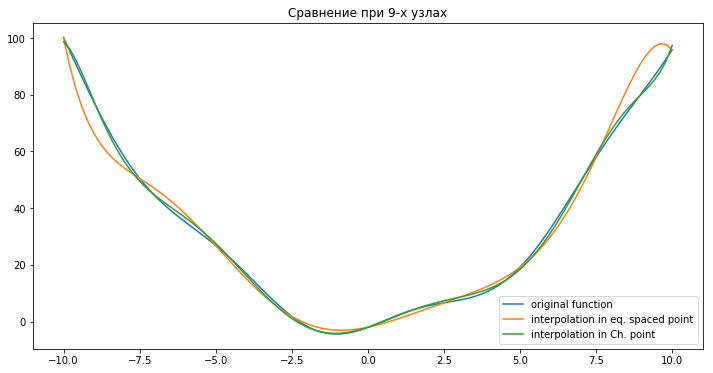

In [308]:
n=9
plot_int(L_n, a, n, get_linspace=get_roots, label2="intepolation in Ch. points")
plot_diff(L_n, L_n, a, n, get_lin_2=get_roots)

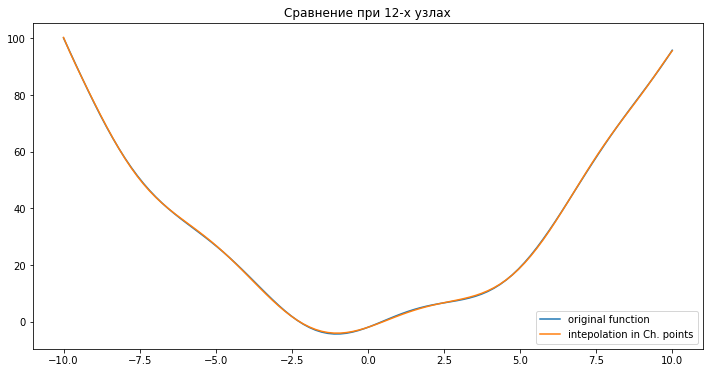

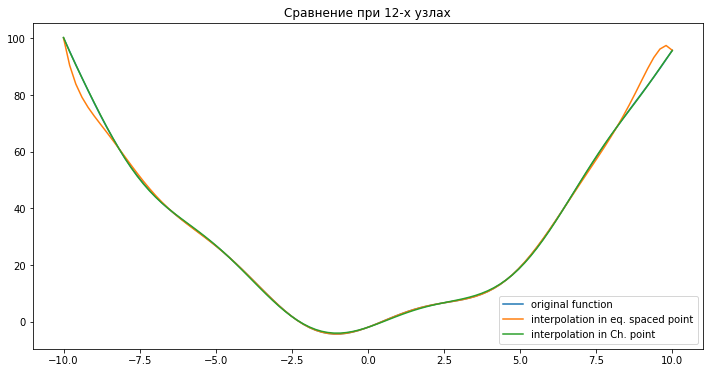

In [307]:
n=12
plot_int(L_n, a, n, get_linspace=get_roots, label2="intepolation in Ch. points")
plot_diff(L_n, L_n, a, n, get_lin_2=get_roots)

### Deviations from original function

In [293]:
n = 100
x = np.linspace(-a, a, n, np.float) # deviation points

Noramal Lg. polynomial

In [296]:
def get_div(L_n, a, n, f=f, get_linspace=get_linspace):
    dev = 0
    x = np.linspace(-a, a, 100, np.float)
    xn = get_linspace(a, n)
    L = lambda x: L_n(x, xn, f)
    for i in range(1, 100):
        dev = max(dev, abs(L(x[i])-f(x[i]))*(x[i]-x[i-1]))
    return dev

For lg. poly in eq. spaced points

In [298]:
get_div(L_n, a, 3)

1.1524956889669284

In [299]:
get_div(L_n, a, 6)

2.1927606353963767

In [300]:
get_div(L_n, a, 9)

2.2598541502910012

In [295]:
get_div(L_n, a, 12)

1.390779604264467

For lg. poly in Ch. points

In [315]:
get_div(L_n, a, 3, get_linspace=get_roots)

1.10329406206303

In [302]:
get_div(L_n, a, 6, get_linspace=get_roots)

1.5094112262892996

In [303]:
get_div(L_n, a, 9, get_linspace=get_roots)

0.33235935162246333

In [297]:
get_div(L_n, a, 12, get_linspace=get_roots)

0.06214969149093107

### Same stuff for $h(x)=|x|f(x)$

In [313]:
def h(x):
    return np.abs(x) * f(x)

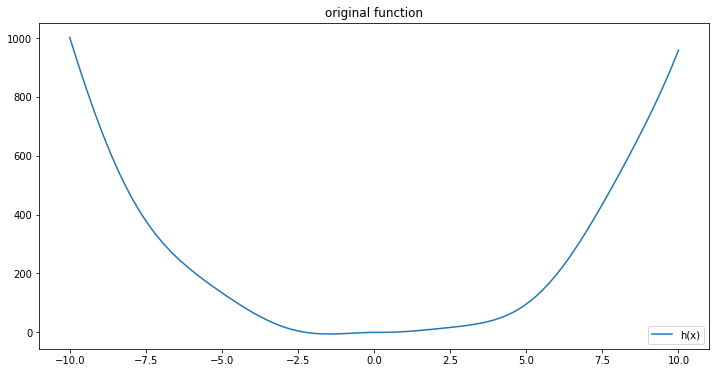

In [314]:
plot_func(h, "h(x)")

In [316]:
def result(n, func=f):
    print("n =", n)
    plot_int(L_n, a, n, f=func)
    plot_int(L_n, a, n, f=func, get_linspace=get_roots, label2="intepolation in Ch. points")
    plot_diff(L_n, L_n, a, n, f=func, get_lin_2=get_roots)
    
    print("Deviation of eq. points is equal to", get_div(L_n, a, n))
    print("Deviation of Ch. points is equal to", get_div(L_n, a, n, get_linspace=get_roots))

n = 12


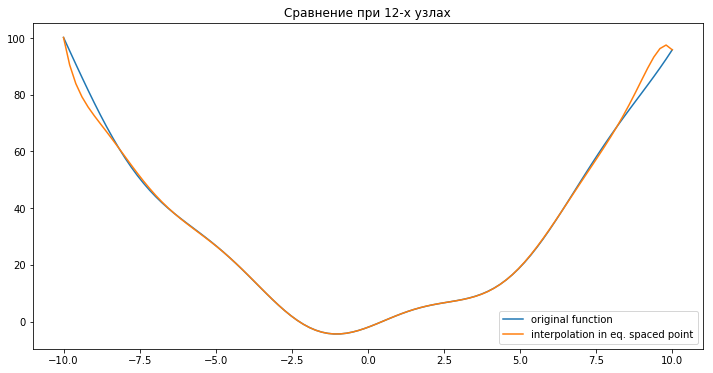

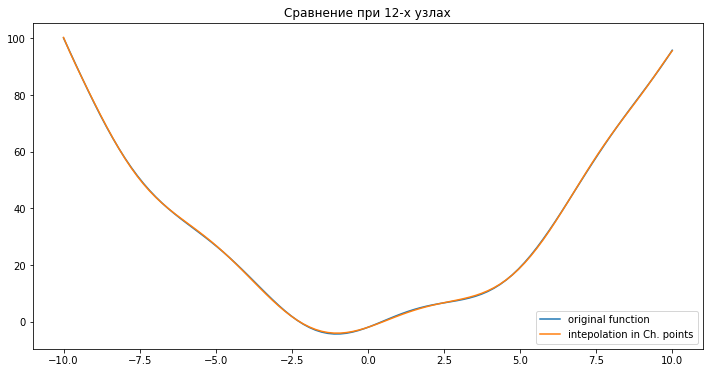

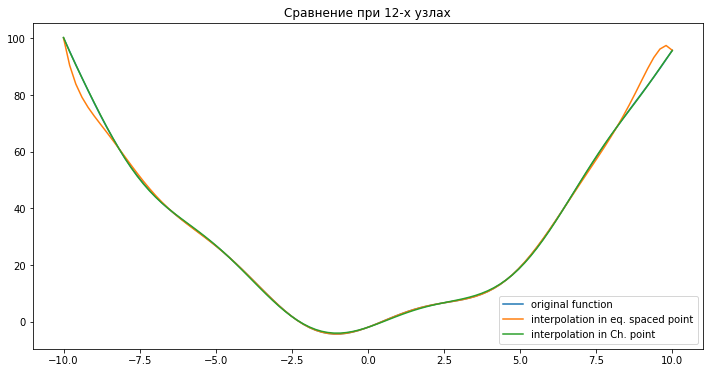

Deviation of eq. points is equal to 1.390779604264467
Deviation of Ch. points is equal to 0.06214969149093107


In [317]:
result(12, f)

n = 3


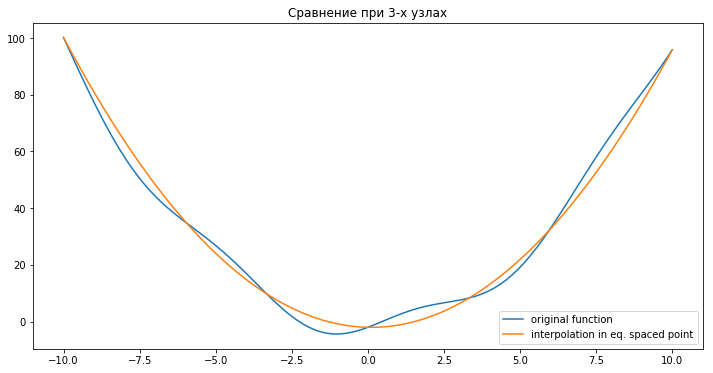

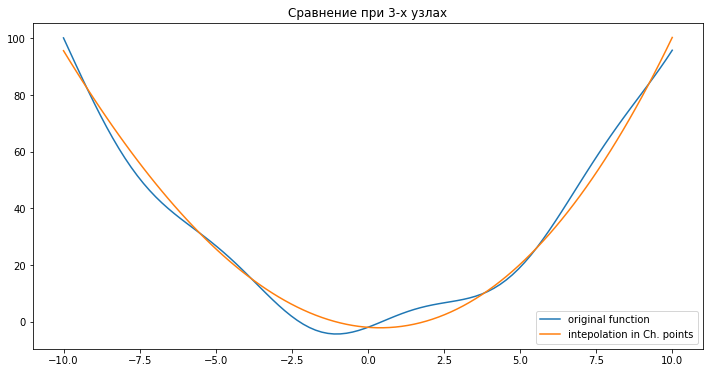

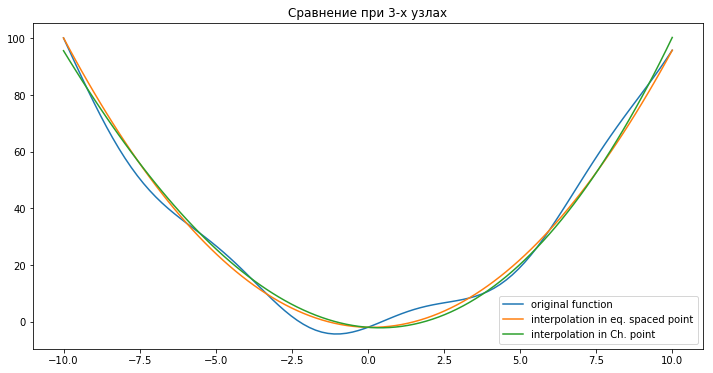

Deviation of eq. points is equal to 1.1524956889669284
Deviation of Ch. points is equal to 1.10329406206303


In [319]:
result(3, f)

n = 3


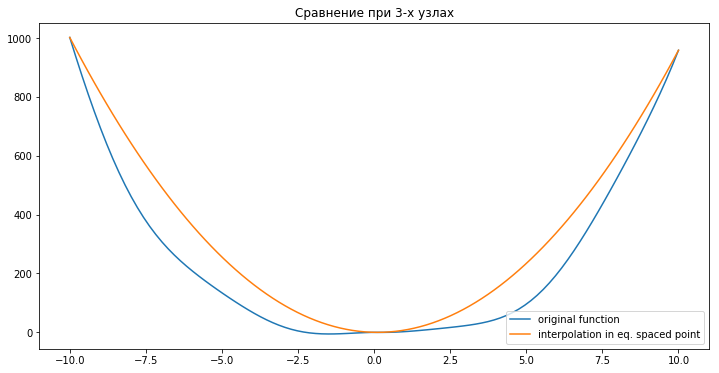

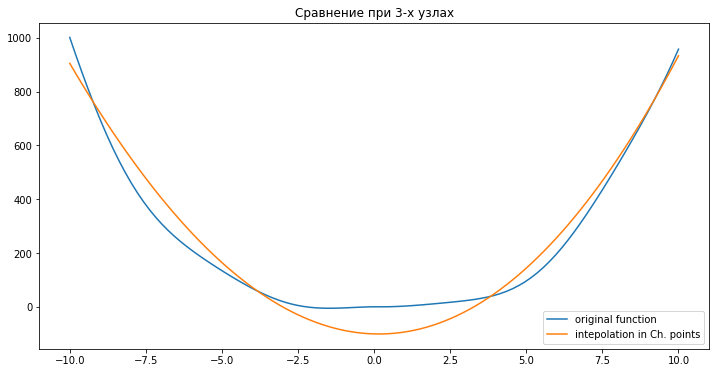

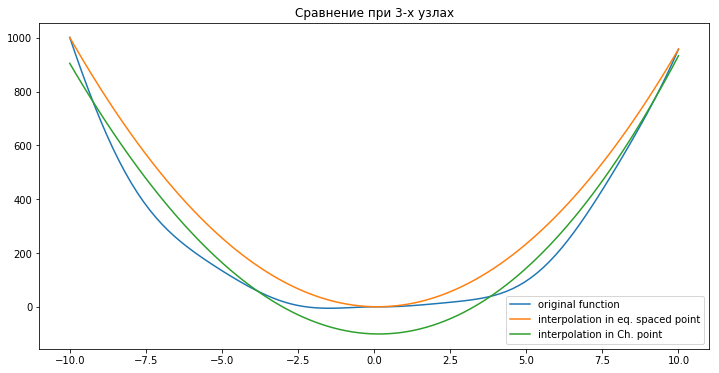

Deviation of eq. points is equal to 1.1524956889669284
Deviation of Ch. points is equal to 1.10329406206303


In [320]:
result(3, h)

n = 12


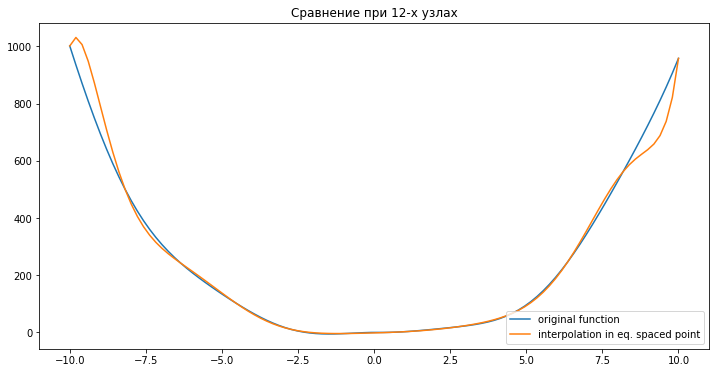

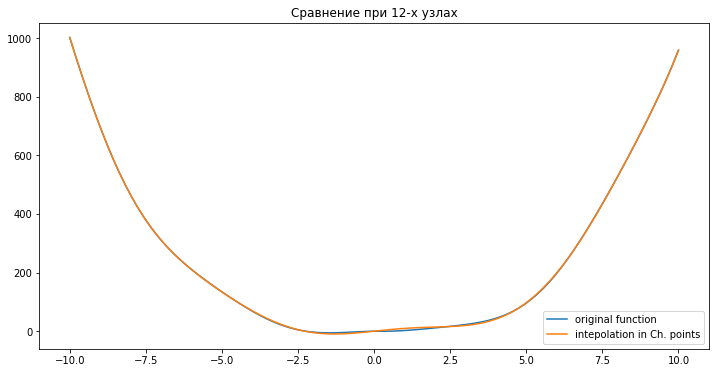

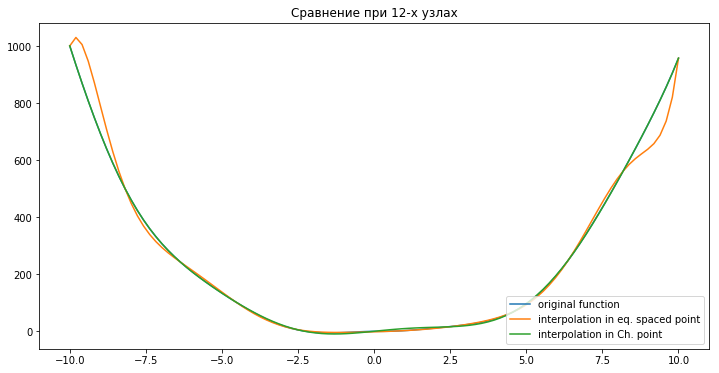

Deviation of eq. points is equal to 1.390779604264467
Deviation of Ch. points is equal to 0.06214969149093107


In [321]:
result(12, h)